# Sample for the Blog: Random Lattice Generators Are Not Bad


In [10]:
import qmcpy as qp
import numpy as np  #basic numerical routines in Python
import time  #timing routines
import warnings  #to suppress warnings when needed
from matplotlib import pyplot;  #plotting

pyplot.rc('font', size=16)  #set defaults so that the plots are readable
pyplot.rc('axes', titlesize=16)
pyplot.rc('axes', labelsize=16)
pyplot.rc('xtick', labelsize=16)
pyplot.rc('ytick', labelsize=16)
pyplot.rc('legend', fontsize=16)
pyplot.rc('figure', titlesize=16)

#a helpful plotting method to show increasing numbers of points
def plot_successive_points(distrib,ld_name,first_n=64,n_cols=1,pt_clr='bgkcmy',
                           xlim=[0,1],ylim=[0,1],coord1 = 0,coord2 = 1):
  fig,ax = pyplot.subplots(nrows=1,ncols=n_cols,figsize=(5*n_cols,5.5))
  if n_cols==1: ax = [ax]
  last_n = first_n*(2**n_cols)
  points = distrib.gen_samples(n=last_n)
  for i in range(n_cols):
    n = first_n
    nstart = 0
    for j in range(i+1):
      n = first_n*(2**j)
      ax[i].scatter(points[nstart:n,coord1],points[nstart:n,coord2],color=pt_clr[j])
      nstart = n
    ax[i].set_title('n = %d'%n)
    ax[i].set_xlim(xlim); ax[i].set_xticks(xlim); ax[i].set_xlabel('$x_{i,%d}$'%(coord1+1))
    ax[i].set_ylim(ylim); ax[i].set_yticks(ylim); ax[i].set_ylabel('$x_{i,%d}$'%(coord2+1))
    ax[i].set_aspect((xlim[1]-xlim[0])/(ylim[1]-ylim[0]))
  fig.suptitle('%s Points'%ld_name)

## Lattice Declaration and the gen_samples function

The *Lattice* Class is for generating low-description lattices, it contains the following parameters:
For conveinence, the default values and desired input values of these parameters are listed orderly in parentheses after each parameter.
1. dimension (1,int): the dimension of the generating vector. If an int is passed in, use sequence dimensions $[0,...,dimensions-1]$;If a ndarray is passed in, use these dimension indices in the sequence.
2. randomize (True,bool): If True, apply shift to generated samples. Note: Non-randomized lattice sequence includes the origin (potentially producing unwanted results).
3. order ("natural",string): 'linear', 'natural', or 'mps' ordering.
4. generating_vector ('lattice_vec.3600.20.npy',ndarray, str or int): generating matrix or path to generating matrices.
5. seed (None,int): seed the random number generator for reproducibility
6. d_max (None,int): maximum dimension
7. m_max (None,int): 2^m_max is the max number of supported samples


The *gen_samples* method of the *Lattice* produces lattice sequences through the following parameters:

1. n (None,int): if n is supplied, generate from n_min=0 to n_max=n samples; Otherwise use the n_min and n_max explicitly supplied as the following 2 arguments
2. n_min (0,int): Starting index of sequence.
3. n_max (8,int): Final index of sequence.
4. return_unrandomized (False,bool): return samples without randomization as 2nd return value. Will not be returned if randomize=False.
5. Warn (True, bool): You will be warned if your sample contains the origin

### Driver code

Basic information of the lattice

Lattice (DiscreteDistribution Object)
    d               2^(1)
    dvec            [0 1]
    randomize       1
    order           natural
    entropy         120
    spawn_key       ()
[[0.34548142 0.46736834]
 [0.84548142 0.96736834]
 [0.59548142 0.21736834]
 [0.09548142 0.71736834]
 [0.47048142 0.34236834]
 [0.97048142 0.84236834]
 [0.72048142 0.09236834]
 [0.22048142 0.59236834]
 [0.40798142 0.40486834]
 [0.90798142 0.90486834]
 [0.65798142 0.15486834]
 [0.15798142 0.65486834]
 [0.53298142 0.27986834]
 [0.03298142 0.77986834]
 [0.78298142 0.02986834]
 [0.28298142 0.52986834]]


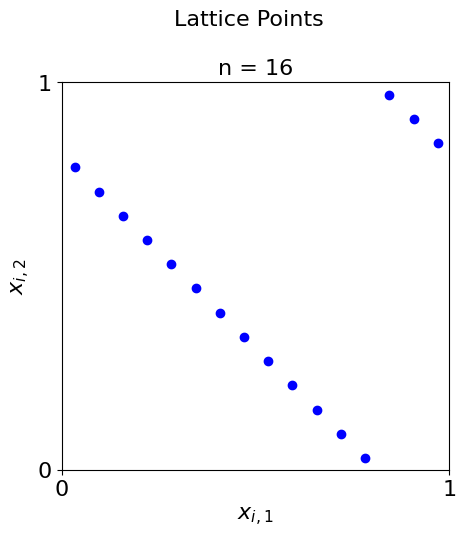

In [21]:
lat = qp.Lattice(dimension = 2,randomize= True, generating_vector=21, seed = 120) 
print("Basic information of the lattice\n")
print(lat)

n = 16 #number of points in the sample
print(lat.gen_samples(n))
plot_successive_points(lat,'Lattice',n)

### Plots of lattices

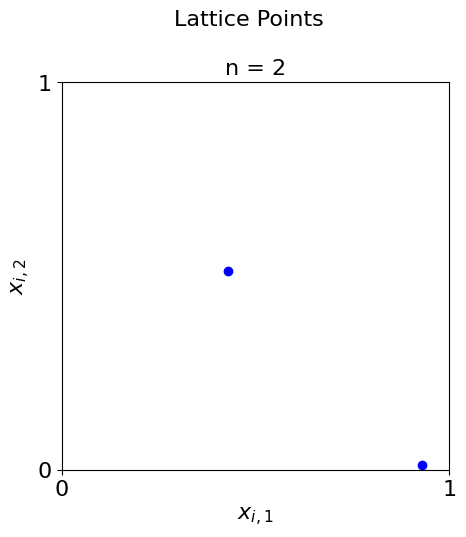

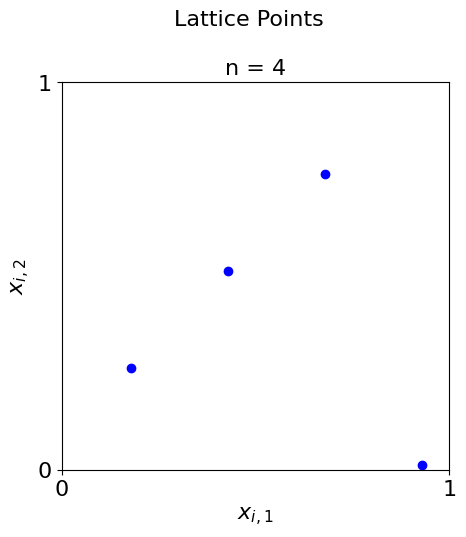

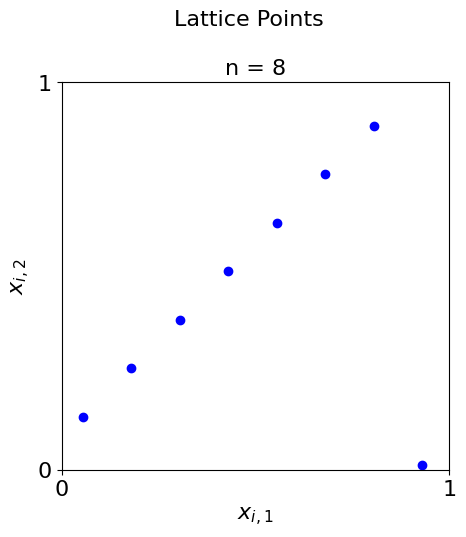

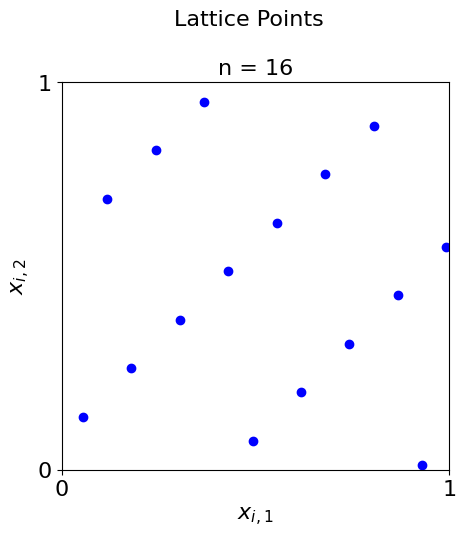

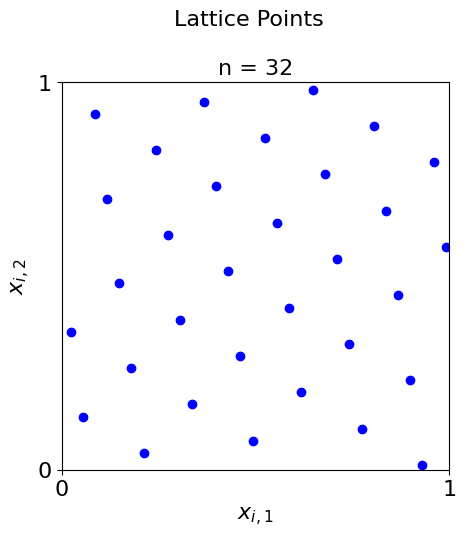

In [28]:
lat = qp.Lattice(dimension=2,generating_vector= 15)
for n in [2,4,8,16,32]:
    plot_successive_points(lat,'Lattice',n)
    
